<a href="https://colab.research.google.com/github/dcrp1234/Machine-Learning/blob/main/Image%20Classification/Tomato%20Leaf%20Disease/%20notebooka8cb89aa3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'tomatoleaf:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F619181%2F1105687%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240722%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240722T012419Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D16888939e5cafc161d468d68bbf928896cddaa6cbbbcf074ed1497db32ef2290c1654f28b0e5d5ee28390c3cd40f9a08be0fe9ebb6dd85ed38bebe22bfe599acdece8be1f4ee860b476196a41f0cc6891b28af23c2d95f68e9cbe7770f2bd10975a37fd9afad6a0bfdbda75e3aa8278cdff59aaa8dd813cdac1913f851a830ac184068cb00429387bbe6291a4fd24aebb0748dc420474189c5a7982001ea2daf47f8a9837356ea513affe94a60ad07802a1b2de2cbb1c011f0dc8613fcdb2af31e71235cbc3a762118482b60daaf22697cdde203c66701b1178ff0ffc9048342cbb997fda467c35749744ffdb14abdac6f592493802ea9ae81508680e9d0ed1b,test-image:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5425565%2F9006015%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240722%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240722T012419Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D995d05e02e7b5b184a2b10bf1d89327e3395698909b5a8b5538b1ad2acc2fcab6f423978e0abeb9e2dbcdbd117a0d5b71fdbe072591e019cca3a45cc0ba1172b07a5ca9a869144d374adf84bc9aed3e94f8d3d7b3752c04ae1b16d60119797b582531048910ed65f2d2d2260b96d8b7a7455e0ecdda6939ffe0f964b6589f02a6e7cafd1c9961082af6d6e049f1e85e3279f9afa7154e73703a56f853f3c31dbd703ceb105a0d33985bf3c5f6f5f5994dbe291c1e9ae0630eb9f56fc1f1eb0cac2dd62ce2c5178b2c4c8e253720340e8a9c0603034c6267a64a7091f46d366ab47695f2a00ca5cd6e582a88ec5959268c24c7958e6bbcb1979da55c5c0f67dbb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

2024-07-22 01:09:07.726958: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 01:09:07.727075: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 01:09:07.845838: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

## Generator

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/tomatoleaf/tomato/train',
    labels = 'inferred',
    image_size=(256, 256),
    batch_size=32,
    shuffle = True,
    label_mode='categorical'
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/tomatoleaf/tomato/val',
    labels = 'inferred',
    image_size=(256, 256),
    batch_size=32,
    shuffle = False,
    label_mode='categorical'
)


Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [ ]:
#import tensorflow_addons as tfa

# Define the augmentation function
def augment(image, label):
    image = tf.image.random_flip_left_right(image)  # Randomly flip image horizontally
    image = tf.image.random_flip_up_down(image)    # Randomly flip image vertically
    image = tf.image.random_brightness(image, max_delta=0.1)  # Randomly adjust brightness
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)  # Randomly adjust contrast
    angle = tf.random.uniform(shape=[], minval=-0.1, maxval=0.1)  # Random angle in radians
    #image = tfa.image.rotate(image, angles=angle)  # Randomly rotate image
    return image, label

In [ ]:
def process(image, label):

    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(augment).map(process)
validation_ds = validation_ds.map(process)

train_ds = train_ds.shuffle(1000).prefetch(tf.data.AUTOTUNE)
validation_ds = validation_ds.prefetch(tf.data.AUTOTUNE)

## Create CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,778 (56.64 MB)

 Trainable params: 14,848,330 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(train_ds, epochs=10, validation_data=validation_ds, callbacks=[early_stopping, model_checkpoint])


Epoch 1/10
  1/313 ━━━━━━━━━━━━━━━━━━━━ 3:36:32 42s/step - accuracy: 0.0625 - loss: 3.5866

I0000 00:00:1721610603.947439     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721610603.978879     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5113 - loss: 1.7501

W0000 00:00:1721610636.934154     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 116ms/step - accuracy: 0.5117 - loss: 1.7487 - val_accuracy: 0.1590 - val_loss: 11.9769
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 75ms/step - accuracy: 0.7537 - loss: 0.7833 - val_accuracy: 0.6630 - val_loss: 1.1793
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.7852 - loss: 0.6873 - val_accuracy: 0.8010 - val_loss: 0.6635
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 75ms/step - accuracy: 0.8241 - loss: 0.5476 - val_accuracy: 0.8530 - val_loss: 0.5488
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - accuracy: 0.8523 - loss: 0.4655 - val_accuracy: 0.8860 - val_loss: 0.4135
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 73ms/step - accuracy: 0.8687 - loss: 0.4265 - val_accuracy: 0.8470 - val_loss: 0.6066
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 75ms/step - accuracy: 0.8772 - loss: 0.3761 - val_accuracy: 0.9130 - val_loss: 0.3559
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 73ms/step - accuracy: 0.8966 - loss: 0.3253 - val_accur

## Plots to show accuracy

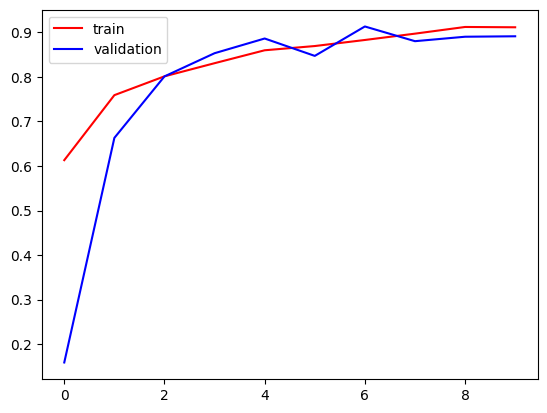

In [ ]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color="blue", label = 'validation')
plt.legend()
plt.show()

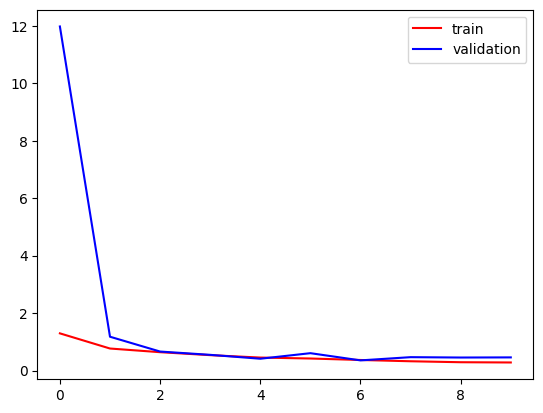

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color="blue", label = 'validation')
plt.legend()
plt.show()